### Practice Assignment 3

[1 2 3 4 5] 
 [ 2  4  6  8 10]
[[1]
 [2]
 [3]
 [4]
 [5]]


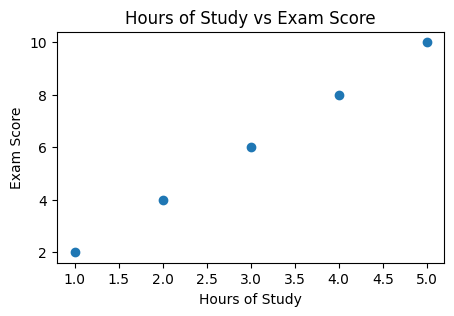

In [166]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('train.csv')
X = data['Hours of Study (x)'].values
y = data['Exam Score (y)'].values
print(X,"\n",y)
X = X.reshape(-1, 1)
print(X)
X = np.c_[np.ones(X.shape[0]), X]
plt.figure(figsize=(5, 3))
plt.scatter(X[:, 1], y)
plt.xlabel('Hours of Study')
plt.ylabel('Exam Score')
plt.title('Hours of Study vs Exam Score')
plt.show()



### Gradient Descent

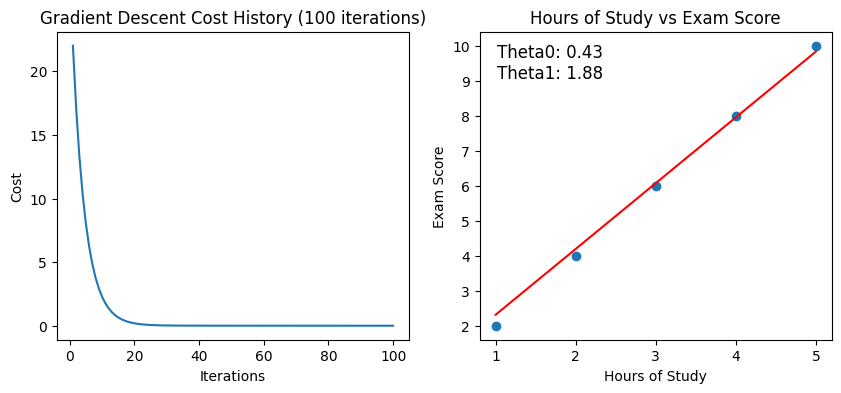

In [167]:
def gradient_descent(X, y, learning_rate=0.01, iterations=100):
    m, n = X.shape
    theta = np.zeros(n)
    cost_history = []
    
    for i in range(iterations):
        h = X.dot(theta)
        gradient = (1/m) * X.T.dot(h - y)
        theta -= learning_rate * gradient
        cost = (1/(2*m)) * np.sum((h - y)**2)
        cost_history.append(cost)
    
    return theta, cost_history

theta_gd, cost_history_gd = gradient_descent(X, y)
#plot cost history
plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(cost_history_gd) + 1), cost_history_gd)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Gradient Descent Cost History (100 iterations)')

y_pred_gd = X.dot(theta_gd)

plt.subplot(1, 2, 2)
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], y_pred_gd, color='red')
plt.xlabel('Hours of Study')
plt.ylabel('Exam Score')
plt.text(0.2, 0.9, 'Theta0: {:.2f}\nTheta1: {:.2f}'.format(theta_gd[0], theta_gd[1]), fontsize=12, ha='center', va='center', transform=plt.gca().transAxes)
plt.title('Hours of Study vs Exam Score')
plt.show()




### Stochastic Gradient Descent

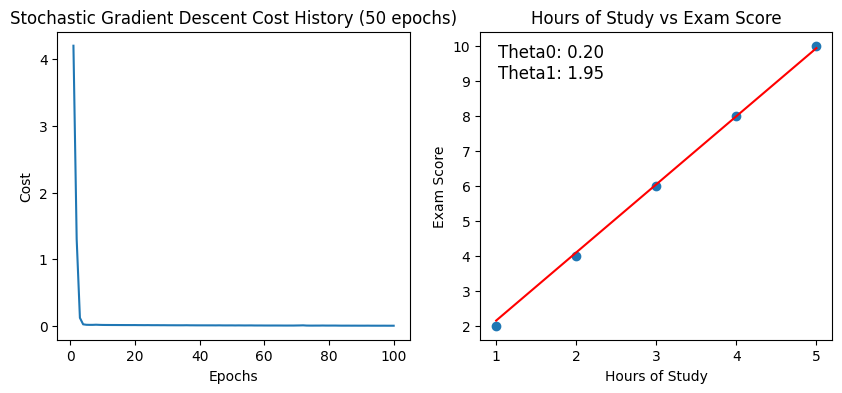

In [168]:

def stochastic_gradient_descent(X, y, learning_rate=0.01, epochs=100):
    m, n = X.shape
    theta = np.zeros(n)
    cost_history = []
    
    for epoch in range(epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            h = xi.dot(theta)
            gradient = xi.T.dot(h - yi)
            theta -= learning_rate * gradient
        
        h = X.dot(theta)
        cost = (1/(2*m)) * np.sum((h - y)**2)
        cost_history.append(cost)
    
    return theta, cost_history

theta_sgd, cost_history_sgd = stochastic_gradient_descent(X, y)
#plot cost history
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(cost_history_sgd) + 1), cost_history_sgd)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Stochastic Gradient Descent Cost History (50 epochs)')


y_pred_sgd = X.dot(theta_sgd)

plt.subplot(1, 2, 2)
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], y_pred_sgd, color='red')
#add theta values to the plot

plt.xlabel('Hours of Study')
plt.ylabel('Exam Score')
plt.title('Hours of Study vs Exam Score')
plt.text(0.2, 0.9, 'Theta0: {:.2f}\nTheta1: {:.2f}'.format(theta_sgd[0], theta_sgd[1]), fontsize=12, ha='center', va='center', transform=plt.gca().transAxes)
plt.show()


### comparing the lines , and cost functions

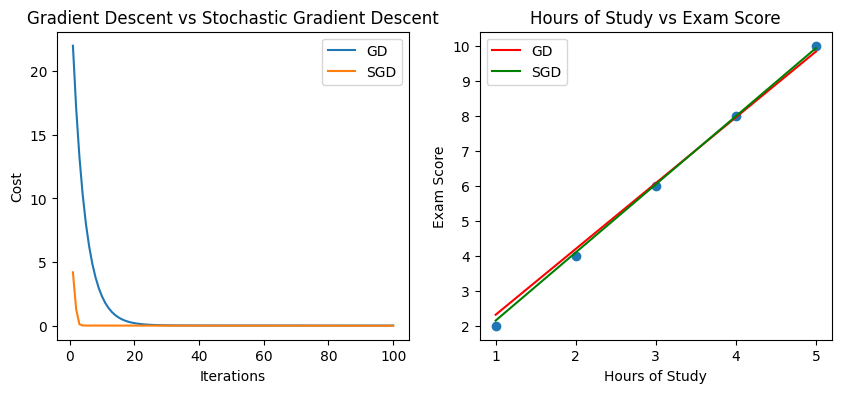

In [169]:
#plot cost history
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(cost_history_gd) + 1), cost_history_gd, label='GD')
plt.plot(range(1, len(cost_history_sgd) + 1), cost_history_sgd, label='SGD')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.title('Gradient Descent vs Stochastic Gradient Descent')


plt.subplot(1, 2, 2)
plt.scatter(X[:, 1], y)
plt.plot(X[:, 1], y_pred_gd, color='red', label='GD')
plt.plot(X[:, 1], y_pred_sgd, color='green', label='SGD')
plt.xlabel('Hours of Study')
plt.ylabel('Exam Score')
plt.legend()
plt.title('Hours of Study vs Exam Score')
plt.show()
